In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
import scipy
print(scipy.__version__)

1.6.0


In [3]:
df_first = pd.read_csv("database.csv")
df = df_first[(df_first['season'] >= 2014) & (df_first['season'] <= 2020)]
df

,season,ligue,avg_xG_h,avg_xG_a,sum_pts_h,sum_pts_a,avg_xpts_h,avg_xpts_a,sum_xG_h,sum_xG_a,avg_pts_h,avg_pts_a,sum_xpts_h,sum_xpts_a
0,2014,Ligue1,1.355645,1.019974,631,421,1.589437,1.142670,515.145064,387.589999,1.660526,1.107895,603.9861,434.2146
1,2015,Ligue1,1.383122,1.020544,588,444,1.622187,1.118924,525.586263,387.806808,1.547368,1.168421,616.4312,425.1911
2,2016,Ligue1,1.454963,1.084908,652,394,1.631113,1.119237,552.886065,412.264892,1.715789,1.036842,619.8230,425.3099
3,2017,Ligue1,1.462624,1.101148,615,429,1.612730,1.146552,555.797165,418.436324,1.618421,1.128947,612.8375,435.6899
4,2018,Ligue1,1.447218,1.104206,602,428,1.596620,1.151402,549.942854,419.598372,1.584211,1.126316,606.7157,437.5328
5,2019,Ligue1,1.419600,1.060398,472,295,1.588157,1.156913,396.068483,295.851119,1.691756,1.057348,443.0958,322.7787
6,2020,Ligue1,1.412118,1.246286,521,524,1.460350,1.299231,536.604726,473.588625,1.371053,1.378947,554.9329,493.7077
10,2014,La Liga,1.517071,1.101853,604,445,1.647633,1.119044,576.486887,418.704095,1.589474,1.171053,626.1004,425.2366
11,2015,La Liga,1.581195,1.180560,641,407,1.613583,1.158473,600.854102,448.612746,1.686842,1.071053,613.1617,440.2198
12,2016,La Liga,1.449108,1.056833,632,419,1.648388,1.106224,550.660928,401.596541,1.663158,1.102632,626.3874,420.3651


## Table with bar charts to visualize and investigate a possible effect of COVID on home advantage

In [4]:
diff_results = pd.DataFrame({
    "LEAGUE": df["ligue"],  # Keep the league column
    "YEAR": df["season"],      # Keep the year column
    "DIFF_POINTS_HOMEAWAY": df["sum_pts_h"] - df["sum_pts_a"],  # Calculate points difference
    "DIFF_XPOINTS_HOMEAWAY": (df["sum_xpts_h"] - df["sum_xpts_a"]).round(0).astype(int)  # Calculate xpoints difference
})

In [5]:
styled_df = diff_results.style.bar(
    subset=["DIFF_POINTS_HOMEAWAY", "DIFF_XPOINTS_HOMEAWAY"], 
    color=['lightcoral', 'mediumseagreen'], 
    align='zero'  # Aligns negative bars to the left
)
styled_df

,LEAGUE,YEAR,DIFF_POINTS_HOMEAWAY,DIFF_XPOINTS_HOMEAWAY
0,Ligue1,2014,210,170
1,Ligue1,2015,144,191
2,Ligue1,2016,258,195
3,Ligue1,2017,186,177
4,Ligue1,2018,174,169
5,Ligue1,2019,177,120
6,Ligue1,2020,-3,61
10,La Liga,2014,159,201
11,La Liga,2015,234,173
12,La Liga,2016,213,206


## Plot of evolution of mean gained points (per match)

In [6]:
leagues = df['ligue'].unique()
leagues

array(['Ligue1', 'La Liga', 'EPL', 'Bundesliga', 'Serie A', 'RFPL'],
      dtype=object)

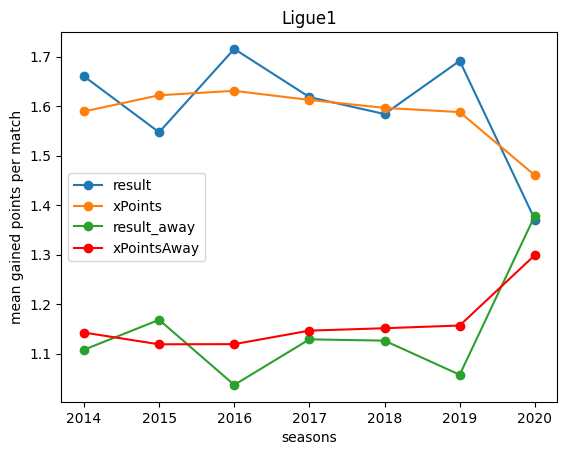

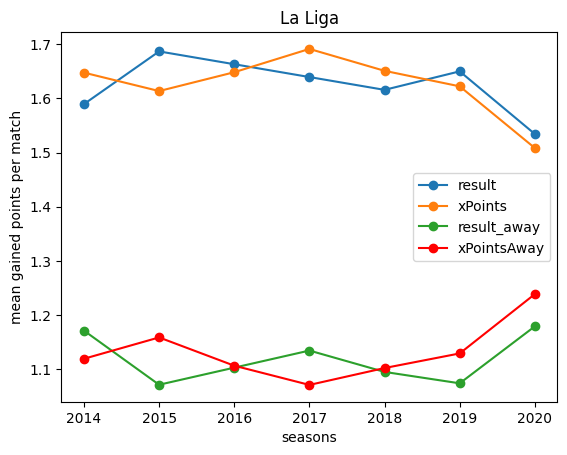

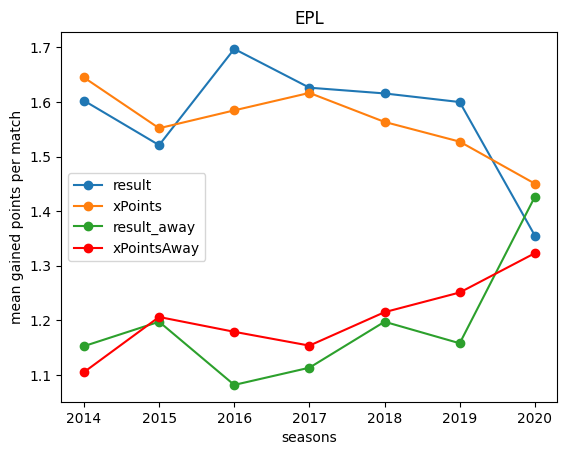

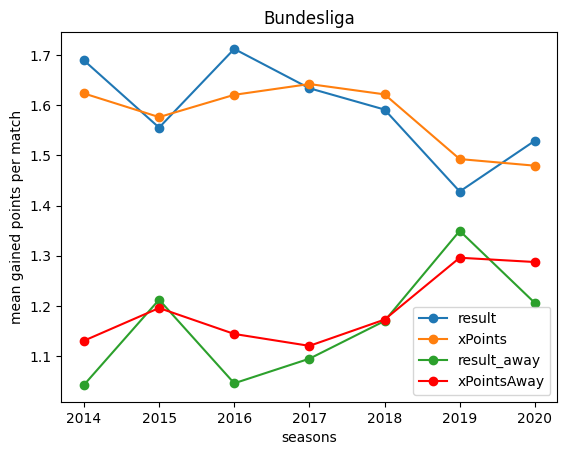

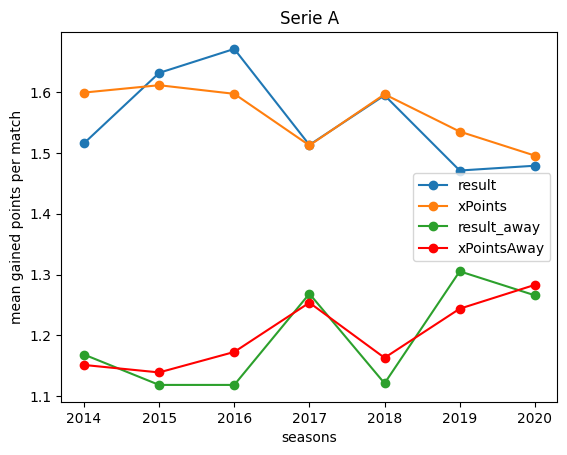

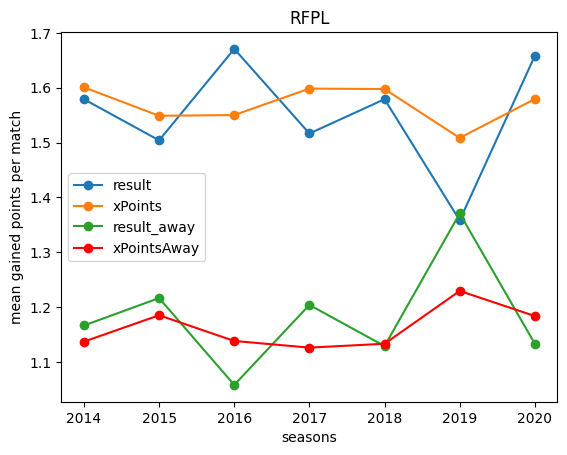

In [7]:
for i, league in enumerate(leagues):
    league_data = df[df['ligue'] == league]  # Filter for league
    plt.plot(league_data['season'], league_data['avg_pts_h'], marker='o', label='result')
    plt.plot(league_data['season'], league_data['avg_xpts_h'], marker='o', label='xPoints')
    plt.plot(league_data['season'], league_data['avg_pts_a'], marker='o', label='result_away')
    plt.plot(league_data['season'], league_data['avg_xpts_a'], marker='o', label='xPointsAway', color='red')
    plt.xlabel('seasons')
    plt.ylabel('mean gained points per match')
    plt.title(league)
    plt.legend()
    plt.show()

## Dataframes for Different Years and Leagues

### Ligue 1

In [8]:
years = range(2014, 2021)  # From 2014 to 2020
dataframes = {}

In [9]:
base_path = './match_database/ligue1/'

In [10]:
for year in years:
    file_path = f'{base_path}{year}.csv'  # Dynamically create file paths
    dataframes[f'df{year}'] = pd.read_csv(file_path)

In [11]:
df_ligue1_2014 = dataframes['df2014']
df_ligue1_2015 = dataframes['df2015']
df_ligue1_2016 = dataframes['df2016']
df_ligue1_2017 = dataframes['df2017']
df_ligue1_2018 = dataframes['df2018']
df_ligue1_2019 = dataframes['df2019']
df_ligue1_2020 = dataframes['df2020']

### La Liga

In [12]:
years = range(2014, 2021)  # From 2014 to 2020
dataframes = {}

In [13]:
base_path = './match_database/la_liga/'

In [14]:
for year in years:
    file_path = f'{base_path}{year}.csv'  # Dynamically create file paths
    dataframes[f'df{year}'] = pd.read_csv(file_path)

In [15]:
df_laliga_2014 = dataframes['df2014']
df_laliga_2015 = dataframes['df2015']
df_laliga_2016 = dataframes['df2016']
df_laliga_2017 = dataframes['df2017']
df_laliga_2018 = dataframes['df2018']
df_laliga_2019 = dataframes['df2019']
df_laliga_2020 = dataframes['df2020']

### Bundesliga

In [16]:
years = range(2014, 2021)  # From 2014 to 2020
dataframes = {}

In [17]:
base_path = './match_database/bundesliga/'

In [18]:
for year in years:
    file_path = f'{base_path}{year}.csv'  # Dynamically create file paths
    dataframes[f'df{year}'] = pd.read_csv(file_path)

In [19]:
df_bundesliga_2014 = dataframes['df2014']
df_bundesliga_2015 = dataframes['df2015']
df_bundesliga_2016 = dataframes['df2016']
df_bundesliga_2017 = dataframes['df2017']
df_bundesliga_2018 = dataframes['df2018']
df_bundesliga_2019 = dataframes['df2019']
df_bundesliga_2020 = dataframes['df2020']

### EPL

In [20]:
years = range(2014, 2021)  # From 2014 to 2020
dataframes = {}

In [21]:
base_path = './match_database/epl/'

In [22]:
for year in years:
    file_path = f'{base_path}{year}.csv'  # Dynamically create file paths
    dataframes[f'df{year}'] = pd.read_csv(file_path)

In [23]:
df_epl_2014 = dataframes['df2014']
df_epl_2015 = dataframes['df2015']
df_epl_2016 = dataframes['df2016']
df_epl_2017 = dataframes['df2017']
df_epl_2018 = dataframes['df2018']
df_epl_2019 = dataframes['df2019']
df_epl_2020 = dataframes['df2020']

### Serie A

In [24]:
years = range(2014, 2021)  # From 2014 to 2020
dataframes = {}

In [25]:
base_path = './match_database/serieA/'

In [26]:
for year in years:
    file_path = f'{base_path}{year}.csv'  # Dynamically create file paths
    dataframes[f'df{year}'] = pd.read_csv(file_path)

In [27]:
df_seriea_2014 = dataframes['df2014']
df_seriea_2015 = dataframes['df2015']
df_seriea_2016 = dataframes['df2016']
df_seriea_2017 = dataframes['df2017']
df_seriea_2018 = dataframes['df2018']
df_seriea_2019 = dataframes['df2019']
df_seriea_2020 = dataframes['df2020']

### RFPL

In [28]:
years = range(2014, 2021)  # From 2014 to 2020
dataframes = {}

In [29]:
base_path = './match_database/rfpl/'

In [30]:
for year in years:
    file_path = f'{base_path}{year}.csv'  # Dynamically create file paths
    dataframes[f'df{year}'] = pd.read_csv(file_path)

In [31]:
df_rfpl_2014 = dataframes['df2014']
df_rfpl_2015 = dataframes['df2015']
df_rfpl_2016 = dataframes['df2016']
df_rfpl_2017 = dataframes['df2017']
df_rfpl_2018 = dataframes['df2018']
df_rfpl_2019 = dataframes['df2019']
df_rfpl_2020 = dataframes['df2020']

## Statistical Tests

In [32]:
results_stat = pd.DataFrame()

### Ligue 1

In [33]:
dataframes = {
    2014: df_ligue1_2014,
    2015: df_ligue1_2015,
    2016: df_ligue1_2016,
    2017: df_ligue1_2017,
    2018: df_ligue1_2018,
    2019: df_ligue1_2019,
    2020: df_ligue1_2020,
}

In [34]:
for season, df in dataframes.items():
    # Filter data for home and away games
    home_pts = df[df['h_a'] == 'h']['pts']
    away_pts = df[df['h_a'] == 'a']['pts']
    home_xpts = df[df['h_a'] == 'h']['xpts']
    away_xpts = df[df['h_a'] == 'a']['xpts']
    home_xg = df[df['h_a'] == 'h']['xG']
    away_xg = df[df['h_a'] == 'a']['xG']
    
    # Perform Wilcoxon Signed-Rank tests
    wilco_result = stats.wilcoxon(home_pts, away_pts)
    wilco_xpts = stats.wilcoxon(home_xpts, away_xpts)
    wilco_xg = stats.wilcoxon(home_xg, away_xg)
    
    # Calculate Cohen's d for each metric
    cohend_result = (home_pts.mean() - away_pts.mean()) / np.sqrt((home_pts.std() ** 2 + away_pts.std() ** 2) / 2)
    cohend_xpts = (home_xpts.mean() - away_xpts.mean()) / np.sqrt((home_xpts.std() ** 2 + away_xpts.std() ** 2) / 2)
    cohend_xg = (home_xg.mean() - away_xg.mean()) / np.sqrt((home_xg.std() ** 2 + away_xg.std() ** 2) / 2)
    
    # Store results in a dictionary
    result = {
        "league": "Ligue_1",
        "season": season,
        "wilco-result": wilco_result.statistic,
        "wilco-result-pvalue": wilco_result.pvalue,
        "result-cohend": cohend_result,
        "wilco-xPoints": wilco_xpts.statistic,
        "wilco-xPoints-pvalue": wilco_xpts.pvalue,
        "xPoints-cohend": cohend_xpts,
        "wilco-xG": wilco_xg.statistic,
        "wilco-xG-pvalue": wilco_xg.pvalue,
        "xG-cohend": cohend_xg,
    }
    
    # Append the result to the results list
    results_stat = pd.concat([results_stat, pd.DataFrame([result])], ignore_index=True)

In [35]:
results_stat

,league,season,wilco-result,wilco-result-pvalue,result-cohend,wilco-xPoints,wilco-xPoints-pvalue,xPoints-cohend,wilco-xG,wilco-xG-pvalue,xG-cohend
0,Ligue_1,2014,10430.0,2.921715e-08,0.423654,19144.0,1.747147e-15,0.592618,23087.0,9.487466e-10,0.428402
1,Ligue_1,2015,8765.0,8.620314e-06,0.296835,16363.5,2.126060e-20,0.665501,21230.0,2.858590e-12,0.484468
2,Ligue_1,2016,8413.0,9.207211e-12,0.531954,17052.5,4.099825e-19,0.676671,21441.0,5.737170e-12,0.479961
3,Ligue_1,2017,7391.0,3.272834e-08,0.378394,18828.5,5.259761e-16,0.576631,22750.0,3.494368e-10,0.439724
4,Ligue_1,2018,7785.0,3.105476e-07,0.361783,19937.0,3.249328e-14,0.578288,21101.0,1.858431e-12,0.444494
5,Ligue_1,2019,3815.5,1.781641e-08,0.495734,10871.0,1.369201e-10,0.558692,12409.0,1.298226e-07,0.440770
6,Ligue_1,2020,15212.5,9.270257e-01,-0.005987,30974.0,1.481952e-02,0.191954,31832.0,4.171908e-02,0.190976


### La Liga

In [36]:
dataframes = {
    2014: df_laliga_2014,
    2015: df_laliga_2015,
    2016: df_laliga_2016,
    2017: df_laliga_2017,
    2018: df_laliga_2018,
    2019: df_laliga_2019,
    2020: df_laliga_2020,
}

In [37]:
for season, df in dataframes.items():
    # Filter data for home and away games
    home_pts = df[df['h_a'] == 'h']['pts']
    away_pts = df[df['h_a'] == 'a']['pts']
    home_xpts = df[df['h_a'] == 'h']['xpts']
    away_xpts = df[df['h_a'] == 'a']['xpts']
    home_xg = df[df['h_a'] == 'h']['xG']
    away_xg = df[df['h_a'] == 'a']['xG']
    
    # Perform Wilcoxon Signed-Rank tests
    wilco_result = stats.wilcoxon(home_pts, away_pts)
    wilco_xpts = stats.wilcoxon(home_xpts, away_xpts)
    wilco_xg = stats.wilcoxon(home_xg, away_xg)
    
    # Calculate Cohen's d for each metric
    cohend_result = (home_pts.mean() - away_pts.mean()) / np.sqrt((home_pts.std() ** 2 + away_pts.std() ** 2) / 2)
    cohend_xpts = (home_xpts.mean() - away_xpts.mean()) / np.sqrt((home_xpts.std() ** 2 + away_xpts.std() ** 2) / 2)
    cohend_xg = (home_xg.mean() - away_xg.mean()) / np.sqrt((home_xg.std() ** 2 + away_xg.std() ** 2) / 2)
    
    # Store results in a dictionary
    result = {
        "league": "La_Liga",
        "season": season,
        "wilco-result": wilco_result.statistic,
        "wilco-result-pvalue": wilco_result.pvalue,
        "result-cohend": cohend_result,
        "wilco-xPoints": wilco_xpts.statistic,
        "wilco-xPoints-pvalue": wilco_xpts.pvalue,
        "xPoints-cohend": cohend_xpts,
        "wilco-xG": wilco_xg.statistic,
        "wilco-xG-pvalue": wilco_xg.pvalue,
        "xG-cohend": cohend_xg,
    }
    
    # Append the result to the results list
    results_stat = pd.concat([results_stat, pd.DataFrame([result])], ignore_index=True)

### EPL

In [38]:
dataframes = {
    2014: df_epl_2014,
    2015: df_epl_2015,
    2016: df_epl_2016,
    2017: df_epl_2017,
    2018: df_epl_2018,
    2019: df_epl_2019,
    2020: df_epl_2020,
}

In [39]:
for season, df in dataframes.items():
    # Filter data for home and away games
    home_pts = df[df['h_a'] == 'h']['pts']
    away_pts = df[df['h_a'] == 'a']['pts']
    home_xpts = df[df['h_a'] == 'h']['xpts']
    away_xpts = df[df['h_a'] == 'a']['xpts']
    home_xg = df[df['h_a'] == 'h']['xG']
    away_xg = df[df['h_a'] == 'a']['xG']
    
    # Perform Wilcoxon Signed-Rank tests
    wilco_result = stats.wilcoxon(home_pts, away_pts)
    wilco_xpts = stats.wilcoxon(home_xpts, away_xpts)
    wilco_xg = stats.wilcoxon(home_xg, away_xg)
    
    # Calculate Cohen's d for each metric
    cohend_result = (home_pts.mean() - away_pts.mean()) / np.sqrt((home_pts.std() ** 2 + away_pts.std() ** 2) / 2)
    cohend_xpts = (home_xpts.mean() - away_xpts.mean()) / np.sqrt((home_xpts.std() ** 2 + away_xpts.std() ** 2) / 2)
    cohend_xg = (home_xg.mean() - away_xg.mean()) / np.sqrt((home_xg.std() ** 2 + away_xg.std() ** 2) / 2)
    
    # Store results in a dictionary
    result = {
        "league": "EPL",
        "season": season,
        "wilco-result": wilco_result.statistic,
        "wilco-result-pvalue": wilco_result.pvalue,
        "result-cohend": cohend_result,
        "wilco-xPoints": wilco_xpts.statistic,
        "wilco-xPoints-pvalue": wilco_xpts.pvalue,
        "xPoints-cohend": cohend_xpts,
        "wilco-xG": wilco_xg.statistic,
        "wilco-xG-pvalue": wilco_xg.pvalue,
        "xG-cohend": cohend_xg,
    }
    
    # Append the result to the results list
    results_stat = pd.concat([results_stat, pd.DataFrame([result])], ignore_index=True)

### Bundesliga

In [40]:
dataframes = {
    2014: df_bundesliga_2014,
    2015: df_bundesliga_2015,
    2016: df_bundesliga_2016,
    2017: df_bundesliga_2017,
    2018: df_bundesliga_2018,
    2019: df_bundesliga_2019,
    2020: df_bundesliga_2020,
}

In [41]:
for season, df in dataframes.items():
    # Filter data for home and away games
    home_pts = df[df['h_a'] == 'h']['pts']
    away_pts = df[df['h_a'] == 'a']['pts']
    home_xpts = df[df['h_a'] == 'h']['xpts']
    away_xpts = df[df['h_a'] == 'a']['xpts']
    home_xg = df[df['h_a'] == 'h']['xG']
    away_xg = df[df['h_a'] == 'a']['xG']
    
    # Perform Wilcoxon Signed-Rank tests
    wilco_result = stats.wilcoxon(home_pts, away_pts)
    wilco_xpts = stats.wilcoxon(home_xpts, away_xpts)
    wilco_xg = stats.wilcoxon(home_xg, away_xg)
    
    # Calculate Cohen's d for each metric
    cohend_result = (home_pts.mean() - away_pts.mean()) / np.sqrt((home_pts.std() ** 2 + away_pts.std() ** 2) / 2)
    cohend_xpts = (home_xpts.mean() - away_xpts.mean()) / np.sqrt((home_xpts.std() ** 2 + away_xpts.std() ** 2) / 2)
    cohend_xg = (home_xg.mean() - away_xg.mean()) / np.sqrt((home_xg.std() ** 2 + away_xg.std() ** 2) / 2)
    
    # Store results in a dictionary
    result = {
        "league": "Bundesliga",
        "season": season,
        "wilco-result": wilco_result.statistic,
        "wilco-result-pvalue": wilco_result.pvalue,
        "result-cohend": cohend_result,
        "wilco-xPoints": wilco_xpts.statistic,
        "wilco-xPoints-pvalue": wilco_xpts.pvalue,
        "xPoints-cohend": cohend_xpts,
        "wilco-xG": wilco_xg.statistic,
        "wilco-xG-pvalue": wilco_xg.pvalue,
        "xG-cohend": cohend_xg,
    }
    
    # Append the result to the results list
    results_stat = pd.concat([results_stat, pd.DataFrame([result])], ignore_index=True)

### Serie A

In [42]:
dataframes = {
    2014: df_seriea_2014,
    2015: df_seriea_2015,
    2016: df_seriea_2016,
    2017: df_seriea_2017,
    2018: df_seriea_2018,
    2019: df_seriea_2019,
    2020: df_seriea_2020,
}

In [43]:
for season, df in dataframes.items():
    # Filter data for home and away games
    home_pts = df[df['h_a'] == 'h']['pts']
    away_pts = df[df['h_a'] == 'a']['pts']
    home_xpts = df[df['h_a'] == 'h']['xpts']
    away_xpts = df[df['h_a'] == 'a']['xpts']
    home_xg = df[df['h_a'] == 'h']['xG']
    away_xg = df[df['h_a'] == 'a']['xG']
    
    # Perform Wilcoxon Signed-Rank tests
    wilco_result = stats.wilcoxon(home_pts, away_pts)
    wilco_xpts = stats.wilcoxon(home_xpts, away_xpts)
    wilco_xg = stats.wilcoxon(home_xg, away_xg)
    
    # Calculate Cohen's d for each metric
    cohend_result = (home_pts.mean() - away_pts.mean()) / np.sqrt((home_pts.std() ** 2 + away_pts.std() ** 2) / 2)
    cohend_xpts = (home_xpts.mean() - away_xpts.mean()) / np.sqrt((home_xpts.std() ** 2 + away_xpts.std() ** 2) / 2)
    cohend_xg = (home_xg.mean() - away_xg.mean()) / np.sqrt((home_xg.std() ** 2 + away_xg.std() ** 2) / 2)
    
    # Store results in a dictionary
    result = {
        "league": "Serie_A",
        "season": season,
        "wilco-result": wilco_result.statistic,
        "wilco-result-pvalue": wilco_result.pvalue,
        "result-cohend": cohend_result,
        "wilco-xPoints": wilco_xpts.statistic,
        "wilco-xPoints-pvalue": wilco_xpts.pvalue,
        "xPoints-cohend": cohend_xpts,
        "wilco-xG": wilco_xg.statistic,
        "wilco-xG-pvalue": wilco_xg.pvalue,
        "xG-cohend": cohend_xg,
    }
    
    # Append the result to the results list
    results_stat = pd.concat([results_stat, pd.DataFrame([result])], ignore_index=True)

### RFPL

In [44]:
dataframes = {
    2014: df_rfpl_2014,
    2015: df_rfpl_2015,
    2016: df_rfpl_2016,
    2017: df_rfpl_2017,
    2018: df_rfpl_2018,
    2019: df_rfpl_2019,
    2020: df_rfpl_2020,
}

In [45]:
for season, df in dataframes.items():
    # Filter data for home and away games
    home_pts = df[df['h_a'] == 'h']['pts']
    away_pts = df[df['h_a'] == 'a']['pts']
    home_xpts = df[df['h_a'] == 'h']['xpts']
    away_xpts = df[df['h_a'] == 'a']['xpts']
    home_xg = df[df['h_a'] == 'h']['xG']
    away_xg = df[df['h_a'] == 'a']['xG']
    
    # Perform Wilcoxon Signed-Rank tests
    wilco_result = stats.wilcoxon(home_pts, away_pts)
    wilco_xpts = stats.wilcoxon(home_xpts, away_xpts)
    wilco_xg = stats.wilcoxon(home_xg, away_xg)
    
    # Calculate Cohen's d for each metric
    cohend_result = (home_pts.mean() - away_pts.mean()) / np.sqrt((home_pts.std() ** 2 + away_pts.std() ** 2) / 2)
    cohend_xpts = (home_xpts.mean() - away_xpts.mean()) / np.sqrt((home_xpts.std() ** 2 + away_xpts.std() ** 2) / 2)
    cohend_xg = (home_xg.mean() - away_xg.mean()) / np.sqrt((home_xg.std() ** 2 + away_xg.std() ** 2) / 2)
    
    # Store results in a dictionary
    result = {
        "league": "RFPL",
        "season": season,
        "wilco-result": wilco_result.statistic,
        "wilco-result-pvalue": wilco_result.pvalue,
        "result-cohend": cohend_result,
        "wilco-xPoints": wilco_xpts.statistic,
        "wilco-xPoints-pvalue": wilco_xpts.pvalue,
        "xPoints-cohend": cohend_xpts,
        "wilco-xG": wilco_xg.statistic,
        "wilco-xG-pvalue": wilco_xg.pvalue,
        "xG-cohend": cohend_xg,
    }
    
    # Append the result to the results list
    results_stat = pd.concat([results_stat, pd.DataFrame([result])], ignore_index=True)

### Results

In [46]:
def highlight_pvalues(val):
    try:
        if pd.notna(val) and float(val) > 0.05:
            return 'color: red;'  # Highlight significant p-values in red
    except ValueError:
        pass
    return ''

# Create a function to style effect sizes (Cohen's d)
def highlight_effect_size(val):
    try:
        val = float(val)
        if val < 0.20:  # Small effect size
            return 'background-color: yellow;'
    except ValueError:
        pass
    return ''

In [47]:
styled_results_stat = results_stat.style.applymap(highlight_pvalues, subset=[
    'wilco-result-pvalue', 'wilco-xPoints-pvalue', 'wilco-xG-pvalue'
]).applymap(highlight_effect_size, subset=[
    'result-cohend', 'xPoints-cohend', 'xG-cohend'
])

In [48]:
styled_results_stat

,league,season,wilco-result,wilco-result-pvalue,result-cohend,wilco-xPoints,wilco-xPoints-pvalue,xPoints-cohend,wilco-xG,wilco-xG-pvalue,xG-cohend
0,Ligue_1,2014,10430.000000,0.000000,0.423654,19144.000000,0.000000,0.592618,23087.000000,0.000000,0.428402
1,Ligue_1,2015,8765.000000,0.000009,0.296835,16363.500000,0.000000,0.665501,21230.000000,0.000000,0.484468
2,Ligue_1,2016,8413.000000,0.000000,0.531954,17052.500000,0.000000,0.676671,21441.000000,0.000000,0.479961
3,Ligue_1,2017,7391.000000,0.000000,0.378394,18828.500000,0.000000,0.576631,22750.000000,0.000000,0.439724
4,Ligue_1,2018,7785.000000,0.000000,0.361783,19937.000000,0.000000,0.578288,21101.000000,0.000000,0.444494
5,Ligue_1,2019,3815.500000,0.000000,0.495734,10871.000000,0.000000,0.558692,12409.000000,0.000000,0.440770
6,Ligue_1,2020,15212.500000,0.927026,-0.005987,30974.000000,0.014820,0.191954,31832.000000,0.041719,0.190976
7,La_Liga,2014,8462.500000,0.000007,0.319278,16927.000000,0.000000,0.620607,20112.000000,0.000000,0.446100
8,La_Liga,2015,8465.500000,0.000000,0.477844,18921.500000,0.000000,0.541456,21406.000000,0.000000,0.435300
9,La_Liga,2016,8089.500000,0.000000,0.430693,16642.500000,0.000000,0.673844,20573.000000,0.000000,0.475527


## Evolution of home advantage within a league

In [49]:
def highlight_significant(val):
    try:
        # Convert value to float and check if it's significant
        if pd.notna(val) and float(val) < 0.05:
            return 'color: red;'
    except ValueError:
        pass  # Skip non-numeric or empty values
    return ''

### Ligue 1

In [50]:
dataframes = {
    2014: df_ligue1_2014,
    2015: df_ligue1_2015,
    2016: df_ligue1_2016,
    2017: df_ligue1_2017,
    2018: df_ligue1_2018,
    2019: df_ligue1_2019,
    2020: df_ligue1_2020,
}

In [51]:
years = list(dataframes.keys())

In [52]:
p_values_matrix = pd.DataFrame(index=years, columns=years, dtype=float)

In [53]:
for i, year1 in enumerate(years):
    for j, year2 in enumerate(years):
        if i <= j:
            continue  # Skip upper triangle and diagonal
        
        # Extract xPoints for the two seasons
        xpoints1 = dataframes[year1][dataframes[year1]['h_a'] == 'h']['xpts']  # Filter home games
        xpoints2 = dataframes[year2][dataframes[year2]['h_a'] == 'h']['xpts']  # Filter home games
        
        # Perform Mann–Whitney U test
        if len(xpoints1) > 0 and len(xpoints2) > 0:  # Ensure both groups have data
            _, p_value = stats.mannwhitneyu(xpoints1, xpoints2)
            p_values_matrix.loc[year1, year2] = p_value

In [54]:
p_values_matrix = p_values_matrix.fillna('')

In [55]:
matrix_ligue1 = p_values_matrix.style.applymap(highlight_significant).set_caption("Ligue 1 xPoints change significance with mann")

In [56]:
display(matrix_ligue1)

,2014,2015,2016,2017,2018,2019,2020
2014,,,,,,,
2015,0.251745,,,,,,
2016,0.207138,0.448466,,,,,
2017,0.321279,0.486951,0.416316,,,,
2018,0.460318,0.307324,0.263694,0.357313,,,
2019,0.475235,0.281316,0.229452,0.329968,0.452614,,
2020,0.012854,0.003026,0.001609,0.005677,0.010800,0.022462,


### La Liga

In [57]:
dataframes = {
    2014: df_laliga_2014,
    2015: df_laliga_2015,
    2016: df_laliga_2016,
    2017: df_laliga_2017,
    2018: df_laliga_2018,
    2019: df_laliga_2019,
    2020: df_laliga_2020,
}

In [58]:
years = list(dataframes.keys())

p_values_matrix = pd.DataFrame(index=years, columns=years, dtype=float)

for i, year1 in enumerate(years):
    for j, year2 in enumerate(years):
        if i <= j:
            continue  # Skip upper triangle and diagonal
        
        # Extract xPoints for the two seasons
        xpoints1 = dataframes[year1][dataframes[year1]['h_a'] == 'h']['xpts']  # Filter home games
        xpoints2 = dataframes[year2][dataframes[year2]['h_a'] == 'h']['xpts']  # Filter home games
        
        # Perform Mann–Whitney U test
        if len(xpoints1) > 0 and len(xpoints2) > 0:  # Ensure both groups have data
            _, p_value = stats.mannwhitneyu(xpoints1, xpoints2)
            p_values_matrix.loc[year1, year2] = p_value
            
p_values_matrix = p_values_matrix.fillna('')

matrix_laliga = p_values_matrix.style.applymap(highlight_significant).set_caption("La Liga xPoints change significance with mann")

In [59]:
display(matrix_laliga)

,2014,2015,2016,2017,2018,2019,2020
2014,,,,,,,
2015,0.297065,,,,,,
2016,0.463205,0.305757,,,,,
2017,0.304484,0.124564,0.262131,,,,
2018,0.401489,0.311108,0.435032,0.204784,,,
2019,0.280138,0.499473,0.294325,0.116348,0.339354,,
2020,0.010252,0.041088,0.010429,0.001273,0.009937,0.030452,


### EPL

In [60]:
dataframes = {
    2014: df_epl_2014,
    2015: df_epl_2015,
    2016: df_epl_2016,
    2017: df_epl_2017,
    2018: df_epl_2018,
    2019: df_epl_2019,
    2020: df_epl_2020,
}

In [61]:
years = list(dataframes.keys())

p_values_matrix = pd.DataFrame(index=years, columns=years, dtype=float)

for i, year1 in enumerate(years):
    for j, year2 in enumerate(years):
        if i <= j:
            continue  # Skip upper triangle and diagonal
        
        # Extract xPoints for the two seasons
        xpoints1 = dataframes[year1][dataframes[year1]['h_a'] == 'h']['xpts']  # Filter home games
        xpoints2 = dataframes[year2][dataframes[year2]['h_a'] == 'h']['xpts']  # Filter home games
        
        # Perform Mann–Whitney U test
        if len(xpoints1) > 0 and len(xpoints2) > 0:  # Ensure both groups have data
            _, p_value = stats.mannwhitneyu(xpoints1, xpoints2)
            p_values_matrix.loc[year1, year2] = p_value
            
p_values_matrix = p_values_matrix.fillna('')

matrix_epl = p_values_matrix.style.applymap(highlight_significant).set_caption("EPL xPoints change significance with mann")

In [62]:
display(matrix_epl)

,2014,2015,2016,2017,2018,2019,2020
2014,,,,,,,
2015,0.061527,,,,,,
2016,0.207185,0.259554,,,,,
2017,0.408533,0.119449,0.291484,,,,
2018,0.104307,0.417928,0.392634,0.208557,,,
2019,0.032631,0.374404,0.193936,0.077736,0.259500,,
2020,0.000772,0.047857,0.015721,0.003938,0.032873,0.102317,


### Bundesliga

In [63]:
dataframes = {
    2014: df_bundesliga_2014,
    2015: df_bundesliga_2015,
    2016: df_bundesliga_2016,
    2017: df_bundesliga_2017,
    2018: df_bundesliga_2018,
    2019: df_bundesliga_2019,
    2020: df_bundesliga_2020,
}

In [64]:
years = list(dataframes.keys())

p_values_matrix = pd.DataFrame(index=years, columns=years, dtype=float)

for i, year1 in enumerate(years):
    for j, year2 in enumerate(years):
        if i <= j:
            continue  # Skip upper triangle and diagonal
        
        # Extract xPoints for the two seasons
        xpoints1 = dataframes[year1][dataframes[year1]['h_a'] == 'h']['xpts']  # Filter home games
        xpoints2 = dataframes[year2][dataframes[year2]['h_a'] == 'h']['xpts']  # Filter home games
        
        # Perform Mann–Whitney U test
        if len(xpoints1) > 0 and len(xpoints2) > 0:  # Ensure both groups have data
            _, p_value = stats.mannwhitneyu(xpoints1, xpoints2)
            p_values_matrix.loc[year1, year2] = p_value
            
p_values_matrix = p_values_matrix.fillna('')

matrix_bundesliga = p_values_matrix.style.applymap(highlight_significant).set_caption("Bundesliga xPoints change significance with mann")

In [65]:
display(matrix_bundesliga)

,2014,2015,2016,2017,2018,2019,2020
2014,,,,,,,
2015,0.231377,,,,,,
2016,0.498632,0.263279,,,,,
2017,0.333005,0.159160,0.389454,,,,
2018,0.407541,0.225637,0.450422,0.436968,,,
2019,0.028356,0.112950,0.032975,0.017482,0.037053,,
2020,0.013052,0.074474,0.015019,0.006203,0.017453,0.423587,


### Serie A

In [66]:
dataframes = {
    2014: df_seriea_2014,
    2015: df_seriea_2015,
    2016: df_seriea_2016,
    2017: df_seriea_2017,
    2018: df_seriea_2018,
    2019: df_seriea_2019,
    2020: df_seriea_2020,
}

In [67]:
years = list(dataframes.keys())

p_values_matrix = pd.DataFrame(index=years, columns=years, dtype=float)

for i, year1 in enumerate(years):
    for j, year2 in enumerate(years):
        if i <= j:
            continue  # Skip upper triangle and diagonal
        
        # Extract xPoints for the two seasons
        xpoints1 = dataframes[year1][dataframes[year1]['h_a'] == 'h']['xpts']  # Filter home games
        xpoints2 = dataframes[year2][dataframes[year2]['h_a'] == 'h']['xpts']  # Filter home games
        
        # Perform Mann–Whitney U test
        if len(xpoints1) > 0 and len(xpoints2) > 0:  # Ensure both groups have data
            _, p_value = stats.mannwhitneyu(xpoints1, xpoints2)
            p_values_matrix.loc[year1, year2] = p_value
            
p_values_matrix = p_values_matrix.fillna('')

matrix_seriea = p_values_matrix.style.applymap(highlight_significant).set_caption("Serie A xPoints change significance with mann")

In [68]:
display(matrix_seriea)

,2014,2015,2016,2017,2018,2019,2020
2014,,,,,,,
2015,0.380808,,,,,,
2016,0.492354,0.420963,,,,,
2017,0.071788,0.050205,0.090418,,,,
2018,0.492618,0.362505,0.474705,0.078774,,,
2019,0.144774,0.107633,0.150452,0.352147,0.164654,,
2020,0.050377,0.032069,0.049711,0.389081,0.058361,0.268684,


### RFPL

In [69]:
dataframes = {
    2014: df_rfpl_2014,
    2015: df_rfpl_2015,
    2016: df_rfpl_2016,
    2017: df_rfpl_2017,
    2018: df_rfpl_2018,
    2019: df_rfpl_2019,
    2020: df_rfpl_2020,
}

In [70]:
years = list(dataframes.keys())

p_values_matrix = pd.DataFrame(index=years, columns=years, dtype=float)

for i, year1 in enumerate(years):
    for j, year2 in enumerate(years):
        if i <= j:
            continue  # Skip upper triangle and diagonal
        
        # Extract xPoints for the two seasons
        xpoints1 = dataframes[year1][dataframes[year1]['h_a'] == 'h']['xpts']  # Filter home games
        xpoints2 = dataframes[year2][dataframes[year2]['h_a'] == 'h']['xpts']  # Filter home games
        
        # Perform Mann–Whitney U test
        if len(xpoints1) > 0 and len(xpoints2) > 0:  # Ensure both groups have data
            _, p_value = stats.mannwhitneyu(xpoints1, xpoints2)
            p_values_matrix.loc[year1, year2] = p_value
            
p_values_matrix = p_values_matrix.fillna('')

matrix_rfpl = p_values_matrix.style.applymap(highlight_significant).set_caption("RFPL xPoints change significance with mann")

In [71]:
display(matrix_rfpl)

,2014,2015,2016,2017,2018,2019,2020
2014,,,,,,,
2015,0.244464,,,,,,
2016,0.241169,0.492911,,,,,
2017,0.477957,0.238307,0.246742,,,,
2018,0.480579,0.245912,0.241991,0.489368,,,
2019,0.092455,0.269055,0.249973,0.082621,0.083882,,
2020,0.401769,0.328437,0.333687,0.444909,0.459114,0.162341,
